<a href="https://colab.research.google.com/github/andysingal/deep-learning/blob/main/pipelines__in_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Building input pipelines in PyTorch

It returns an object of the DataLoader class, which we can use to iterate through the individual elements in the input dataset.

In [11]:
import pandas as pd
import numpy as np

import torch
from torch.utils.data import DataLoader

In [2]:
t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t)

In [3]:
data_loader = DataLoader(t, batch_size=3, drop_last=False)

for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', batch)

batch 1: tensor([0., 1., 2.])
batch 2: tensor([3., 4., 5.])


#Combining two tensors into a joint dataset

A custom Dataset class must contain the following methods to be used by the data loader later on:

__init__(): This is where the initial logic happens, such as reading existing arrays, loading a file, filtering data, and so forth.
__getitem__(): This returns the corresponding sample to the given index.

In [4]:
from torch.utils.data import Dataset

class JointDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __len__(self):
        return len(self.x)
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [5]:
torch.manual_seed(1)

t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)
joint_dataset = JointDataset(t_x, t_y)

# Or use TensorDataset directly
from torch.utils.data import TensorDataset
joint_dataset = TensorDataset(t_x, t_y)

for example in joint_dataset:
    print('  x: ', example[0], 
          '  y: ', example[1])

  x:  tensor([0.7576, 0.2793, 0.4031])   y:  tensor(0)
  x:  tensor([0.7347, 0.0293, 0.7999])   y:  tensor(1)
  x:  tensor([0.3971, 0.7544, 0.5695])   y:  tensor(2)
  x:  tensor([0.4388, 0.6387, 0.5247])   y:  tensor(3)


#Shuffle, batch, and repeat
As was mentioned in Chapter 2, Training Simple Machine Learning Algorithms for Classification, when training an NN model using stochastic gradient descent optimization, it is important to feed training data as randomly shuffled batches. You have already seen how to specify the batch size using the batch_size argument of a data loader object. Now, in addition to creating batches, you will see how to shuffle and reiterate over the datasets. 

In [6]:
torch.manual_seed(1)
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)

for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0], 
              '\n         y:', batch[1])
        
for epoch in range(2):
    print(f'epoch {epoch+1}')
    for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0], 
              '\n         y:', batch[1])

batch 1: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
         y: tensor([2, 0])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
         y: tensor([1, 3])
epoch 1
batch 1: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695]]) 
         y: tensor([0, 2])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
         y: tensor([1, 3])
epoch 2
batch 1: x: tensor([[0.4388, 0.6387, 0.5247],
        [0.3971, 0.7544, 0.5695]]) 
         y: tensor([3, 2])
batch 2: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]]) 
         y: tensor([0, 1])


#Creating a dataset from files on your local storage disk


In [7]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [9]:
import pathlib

imgdir_path = pathlib.Path('/content/drive/MyDrive/cat_dog_images')

file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])

print(file_list)


['/content/drive/MyDrive/cat_dog_images/cat-01.jpg', '/content/drive/MyDrive/cat_dog_images/cat-02.jpg', '/content/drive/MyDrive/cat_dog_images/cat-03.jpg', '/content/drive/MyDrive/cat_dog_images/dog-01.jpg', '/content/drive/MyDrive/cat_dog_images/dog-02.jpg', '/content/drive/MyDrive/cat_dog_images/dog-03.jpg']


Image shape:  (900, 1200, 3)
Image shape:  (900, 1200, 3)
Image shape:  (900, 742, 3)
Image shape:  (800, 1200, 3)
Image shape:  (800, 1200, 3)
Image shape:  (900, 1200, 3)


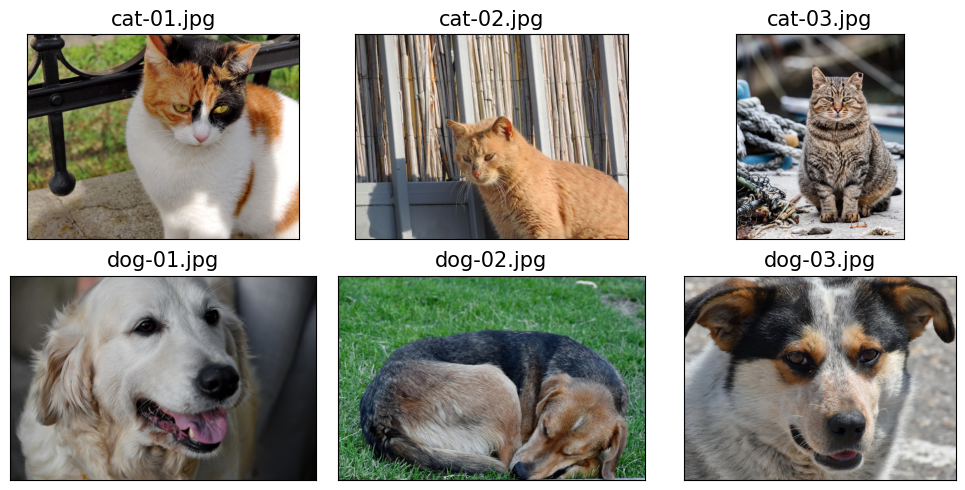

In [12]:
import matplotlib.pyplot as plt
import os
from PIL import Image


fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
    img = Image.open(file)
    print('Image shape: ', np.array(img).shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
    
#plt.savefig('figures/12_03.pdf')
plt.tight_layout()
plt.show()

In [13]:
labels = [1 if 'dog' in os.path.basename(file) else 0
          for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


Now, we have two lists: a list of filenames (or paths of each image) and a list of their labels. In the previous section, you learned how to create a joint dataset from two arrays.

In [14]:
class ImageDataset(Dataset):
    def __init__(self, file_list, labels):
        self.file_list = file_list
        self.labels = labels

    def __getitem__(self, index):
        file = self.file_list[index]      
        label = self.labels[index]
        return file, label

    def __len__(self):
        return len(self.labels)
    
image_dataset = ImageDataset(file_list, labels)
for file, label in image_dataset:
    print(file, label)

/content/drive/MyDrive/cat_dog_images/cat-01.jpg 0
/content/drive/MyDrive/cat_dog_images/cat-02.jpg 0
/content/drive/MyDrive/cat_dog_images/cat-03.jpg 0
/content/drive/MyDrive/cat_dog_images/dog-01.jpg 1
/content/drive/MyDrive/cat_dog_images/dog-02.jpg 1
/content/drive/MyDrive/cat_dog_images/dog-03.jpg 1


#TRANSFORMATION

we use the torchvision.transforms module to resize the images and convert the loaded pixels into tensors as follows:

In [16]:
import torchvision.transforms as transforms

class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform
    def __getitem__(self, index):
        img = Image.open(self.file_list[index])        
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label
    def __len__(self):
        return len(self.labels)

img_height, img_width = 80, 120
    
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_height, img_width)),
])
    
image_dataset = ImageDataset(file_list, labels, transform)

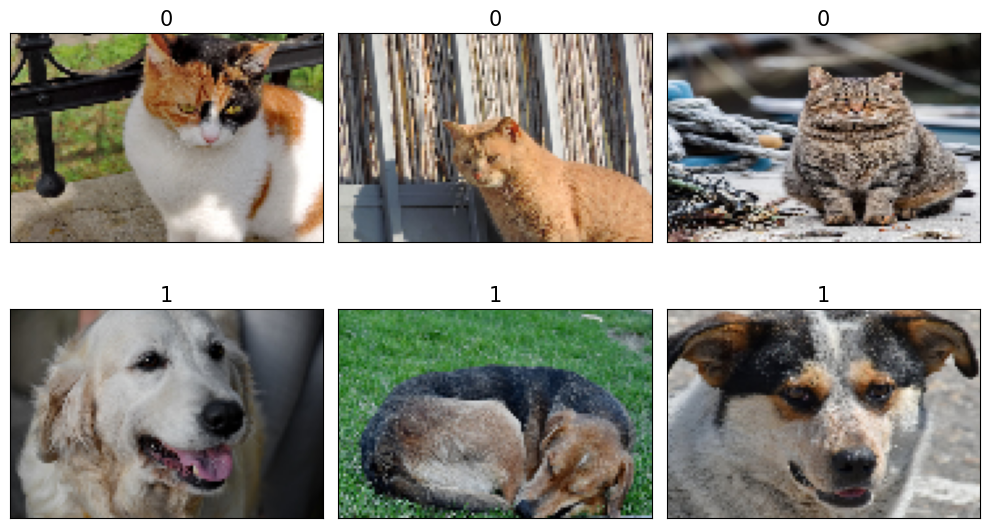

In [19]:
fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(image_dataset):
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0].numpy().transpose((1, 2, 0)))
    ax.set_title(f'{example[1]}', size=15)
    
plt.tight_layout()
plt.show()

# Fetching available datasets from the torchvision.datasets library

In [31]:
import torchvision
from itertools import islice
image_path = './'

100%|██████████| 9912422/9912422 [00:00<00:00, 205633043.39it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 23789413.56it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 62636568.13it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 14132439.74it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

(<PIL.Image.Image image mode=L size=28x28 at 0x7F715AC127D0>, 5)


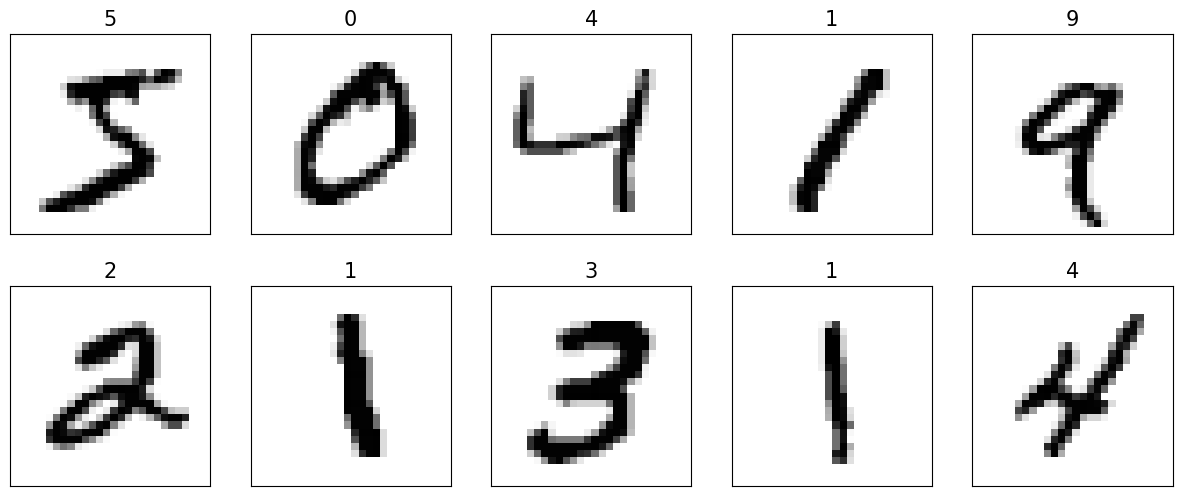

In [32]:
mnist_dataset = torchvision.datasets.MNIST(image_path, 'train', download=True)

assert isinstance(mnist_dataset, torch.utils.data.Dataset)

example = next(iter(mnist_dataset))
print(example)

fig = plt.figure(figsize=(15, 6))
for i, (image, label) in islice(enumerate(mnist_dataset), 10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}', size=15)

#plt.savefig('figures/12_06.pdf')
plt.show()

In [34]:
# celeba_dataset = torchvision.datasets.CelebA(image_path, split='train', target_type='attr', download=True)

# assert isinstance(celeba_dataset, torch.utils.data.Dataset)

RuntimeError: ignored